# Project 2020 Machine Learning and Statistics
***

### Instructions
In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. You must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests. Your submission must be in the form of a git repository containing, at a minimum, the following items:
1. Jupyter notebook that trains a model using the data set. In the notebook you should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.

To enhance your submission, you might consider developing and comparing more than one model. Rest assured, all the above concepts will be explored in lecture videos and other materials in the coming semester.


### Wind Power
Wind power is the generation of electricity from wind. Wind power harvests the primary energy flow of the atmosphere generated from the uneven heating of the Earth’s surface by the Sun. Therefore, wind power is an indirect way to harness solar energy. Wind power is converted to electrical energy by wind turbines.

### Wind Speed Vs Power

Wind speed largely determines the amount of electricity generated by a turbine. Higher wind speeds generate more power because stronger winds allow the blades to rotate faster. Faster rotation translates to more mechanical power and more electrical power from the generator. The relationship between wind speed and power for a typical wind turbine is shown below

![title](images/Windpowercurve.png)

Turbines are designed to operate within a specific range of wind speeds. The limits of the range are known as the cut-in speed and cut-out speed.The cut-in speed is the point at which the wind turbine is able to generate power. Between the cut-in speed and the rated speed, where the maximum output is reached.

The cut-out speed is the point at which the turbine must be shut down to avoid damage to the equipment. The cut-in and cut-out speeds are related to the turbine design and size and are decided on prior to construction

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import sklearn.cluster as skcl


#Read in powerproduction csv file from github url
df = pd.read_csv("https://raw.githubusercontent.com/EoinStankard/Machine-Learning-Statistics-Project/main/powerproduction.csv")
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [149]:
# description of the dataset given including max min and average speed and power
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


#### Wind speed Vs Power with our data

Plotting wind speed vs power usinf the data given for this assingment
Below is a scatter plot shown in blue wit the best fit line shown in red

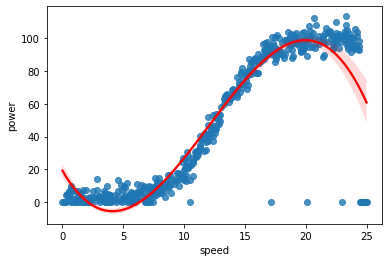

In [150]:
sns.regplot(x="speed", y="power", data=df,order=3,label ="order=3", line_kws={"color": "red"})

#### Plotting values by speed

In [151]:
#sorting the dataset by speed so they can then be divided up into groups
df.sort_values(by='speed', ascending=True).head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


Below is a scatter plot of three different speed ranges, 0-10,10-20 and 25+

In [152]:
lowspeed = df[(df["speed"] >= 0) & (df["speed"]<=10)] # low speed between 0-10
medspeed= df[(df["speed"] > 10) & (df["speed"]<=20)] # Medium speed between 10-20
highspeed=df[(df["speed"] > 20)] # High speed between 20+

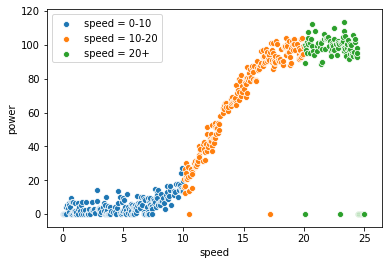

In [153]:
sns.scatterplot(x="speed", y="power", data=lowspeed,label ="speed = 0-10")
sns.scatterplot(x="speed", y="power", data=medspeed,label ="speed = 10-20")
sns.scatterplot(x="speed", y="power", data=highspeed,label ="speed = 20+")
plt.legend()

In [154]:
speedData = [["0-10",lowspeed['power'].min(),lowspeed['power'].max(),lowspeed['power'].mean()],
            ["10-20",medspeed['power'].min(),medspeed['power'].max(),medspeed['power'].mean()],
            ["20+",highspeed['power'].min(),highspeed['power'].max(),highspeed['power'].mean()],]

print("\nPower outputs for each speed group, 0-10, 10-20 & 20+")
pd.DataFrame(speedData, columns=["Speed","Min pwr", "Max pwr","Mean pwr"])



Power outputs for each speed group, 0-10, 10-20 & 20+


,Speed,Min pwr,Max pwr,Mean pwr
0,0-10,0.0,27.136,5.405267
1,10-20,0.0,104.188,69.654178
2,20+,0.0,113.556,87.270062


#### Plotting values by power

In [155]:
lowpower = df[(df["power"] >= 0) & (df["power"] < 40)] # low speed between 0-10
medpower= df[(df["power"] >= 39) & (df["power"] <80)] # Medium speed between 10-20
highpower=df[(df["power"] >= 80)] # High speed between 20+

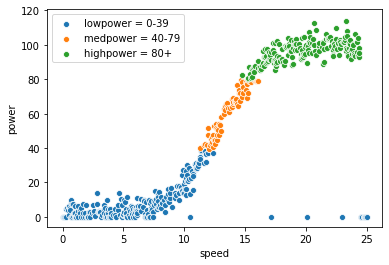

In [156]:
sns.scatterplot(x="speed", y="power", data=lowpower,label ="lowpower = 0-39")
sns.scatterplot(x="speed", y="power", data=medpower,label ="medpower = 40-79")
sns.scatterplot(x="speed", y="power", data=highpower,label ="highpower = 80+")

In [157]:
speedData = [["0-39",lowpower['speed'].min(),lowpower['speed'].max(),lowpower['speed'].mean()],
            ["40-79",medpower['speed'].min(),medpower['speed'].max(),medpower['speed'].mean()],
            ["80+",highpower['speed'].min(),highpower['speed'].max(),highpower['speed'].mean()],]

print("Speed outputs for each power group, 0-39, 40-79 & 80+")
pd.DataFrame(speedData, columns=["Power","Min sp", "Max sp","Mean sp"])

Speed outputs for each power group, 0-39, 40-79 & 80+


,Power,Min sp,Max sp,Mean sp
0,0-39,0.000,25.000,6.852305
1,40-79,11.311,16.041,13.614986
2,80+,14.765,24.399,19.897760


## Preforming K-Means fitting
***

Here i will preform kmeans fitting where i will set the function to automatically divide the data into three clusters, I will then display the data on a graph like above

In [158]:
# Perform kmeans fitting.
X = df[['speed', 'power']].to_numpy()
kmeans = skcl.KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2,

Plot the three clusters that Kmeans has calculated

Text(0, 0.5, 'Power')

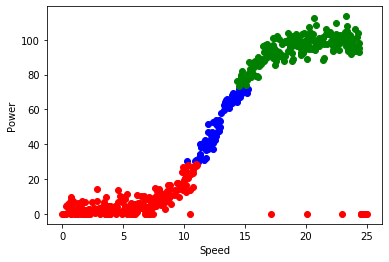

In [159]:
# Plot the data set.
plt.plot(X[kmeans.labels_ == 0][:,0], X[kmeans.labels_ == 0][:,1], 'bo')
plt.plot(X[kmeans.labels_ == 1][:,0], X[kmeans.labels_ == 1][:,1], 'ro')
plt.plot(X[kmeans.labels_ == 2][:,0], X[kmeans.labels_ == 2][:,1], 'go')
plt.xlabel("Speed")
plt.ylabel("Power")

Get the centerpoint of each cluster

In [160]:
# The centres of clusters.
mycent = kmeans.cluster_centers_
mycent

array([[12.79975342, 51.26269863],
       [ 6.51265939,  6.53523581],
       [19.54251515, 94.79063636]])

Plot the graph once again with the center points of each cluster marked with an 'x'

Text(0, 0.5, 'Power')

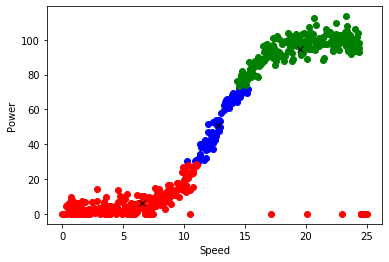

In [161]:
plt.plot(X[kmeans.labels_ == 0][:,0], X[kmeans.labels_ == 0][:,1], 'bo')
plt.plot(X[kmeans.labels_ == 1][:,0], X[kmeans.labels_ == 1][:,1], 'ro')
plt.plot(X[kmeans.labels_ == 2][:,0], X[kmeans.labels_ == 2][:,1], 'go')
plt.plot(mycent[:,0], mycent[:,1], 'kx')
plt.xlabel("Speed")
plt.ylabel("Power")

## Linear Regression
***

#### Line of best Fit
Find the line of best fit and plot it with all the data points

In [162]:
x = df["speed"]
y = df["power"]
l = np.linspace(x.min(), x.max(), len(x))
np.polyfit(x, y, 1)

array([  4.91759567, -13.89990263])

In [163]:
# Create variables with those values.
m, c = np.polyfit(x, y, 1)
# Have a look at m and c.
m, c

(4.917595665404667, -13.899902630519604)

Text(0, 0.5, 'Power')

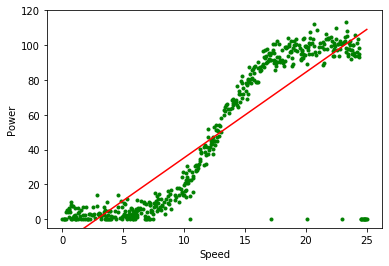

In [164]:
# Plot x and y and the regression line in red.
plt.plot(x, y, 'g.')
plt.plot(x, m * x + c, 'r-')
plt.ylim([-5.0, 120.0]);
plt.xlabel("Speed")
plt.ylabel("Power")

## References

1. https://energyeducation.ca/encyclopedia/Wind_power#:~:text=Wind%20speed%20largely%20determines%20the,electrical%20power%20from%20the%20generator.

2. https://seaborn.pydata.org/generated/seaborn.regplot.html
3. https://stackoverflow.com/questions/35160256/how-do-i-output-lists-as-a-table-in-jupyter-notebook
4. https://seaborn.pydata.org/generated/seaborn.scatterplot.html
5. https://seaborn.pydata.org/generated/seaborn.regplot.html
6. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
7. https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/regression.ipynb
8. https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/kmeans-examples.ipynb


# END